In [1]:
%reload_ext autoreload
%autoreload 2

import socket
import os
if socket.gethostname().startswith('ax'):
    path_prefix = '/mnt/smb/locker/miller-locker/users/Tahereh'
    path_codes = '/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    sys.path.append('/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Illusions')
elif socket.gethostname().startswith('demo'):
    path_prefix = '/home/tahereh/engram/users/Tahereh'
    path_codes = '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    
print(os.getcwd())

## Settings of results 
fontsize_text = 25
color_text = 'mediumseagreen'
fontsize_text = 12


resultsdir = os.path.join(path_prefix, 'Research/Results/Generative_Inference')

# get the labels for imagenet
from Stimuli.load_stimuli import labels_imagenet


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference
Kernel running on local computer 'demo'.
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']


/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


image names:  ('self', 'image_name', 'image_original', 'cmap')


In [396]:
import torch

# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
class Args:
    def __init__(self) -> None:
        self.model_arch = 'resnet50' #'resnext50-32x4d'#'resnet18' #'vgg16-bn' #'vgg16'#'resnet50'
        
        self.dataset_model = 'imagenetvggface2' #'imagenet' #'vggface2' # 'imagenetvggface2'#'vggface2' #'imagenet'
        self.model_training ='advrobust_L2_eps_3.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
        # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
        # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
        self.epoch_chkpnt = '100' #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
        self.eval_dataset_identifier = 'vggface2_test'
        self.batch_size = 32


args = Args()

if args.dataset_model == 'vggface2':
    # assert args.model_training == 'advrobust_L2_eps_0.50'
    args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.n_classes = 500
elif 'imagenet' in  args.dataset_model or 'places365' in args.dataset_model:
    args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
    args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
    args.n_classes = 1000
else:
    raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
          

#'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
# Load the model -----------------------------
model_args = {'model_arch': args.model_arch, 
              'model_training': args.model_training,
              'dataset': args.dataset_model,
              'epoch_chkpnt': args.epoch_chkpnt,
              'norm_mean': args.norm_mean,
              'norm_std': args.norm_std,
              'n_classes': args.n_classes,
            #   'inference': args.inference
              }

from Models import load_models
model, _ = load_models.load_models(model_args)
model = torch.nn.DataParallel(model).cuda()
_=model.eval()


args is a dictionary
get_dict_hash: dataset: imagenetvggface2, model_arch: resnet50
Loading ds=imagenet for imagenetvggface2
Loading model from imagenetvggface2
****** Loading model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenetvggface2_eps_3.00/540a1066-2902-4ed4-9562-53d4fde58440/100_checkpoint.pt after adjusting the model architecture
=> loading checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenetvggface2_eps_3.00/540a1066-2902-4ed4-9562-53d4fde58440/100_checkpoint.pt'


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/Models/load_models.py:362: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(l

odict_keys(['module.normalizer.new_mean', 'module.normalizer.new_std', 'module.model.conv1.weight', 'module.model.bn1.weight', 'module.model.bn1.bias', 'module.model.bn1.running_mean', 'module.model.bn1.running_var', 'module.model.bn1.num_batches_tracked', 'module.model.layer1.0.conv1.weight', 'module.model.layer1.0.bn1.weight', 'module.model.layer1.0.bn1.bias', 'module.model.layer1.0.bn1.running_mean', 'module.model.layer1.0.bn1.running_var', 'module.model.layer1.0.bn1.num_batches_tracked', 'module.model.layer1.0.conv2.weight', 'module.model.layer1.0.bn2.weight', 'module.model.layer1.0.bn2.bias', 'module.model.layer1.0.bn2.running_mean', 'module.model.layer1.0.bn2.running_var', 'module.model.layer1.0.bn2.num_batches_tracked', 'module.model.layer1.0.conv3.weight', 'module.model.layer1.0.bn3.weight', 'module.model.layer1.0.bn3.bias', 'module.model.layer1.0.bn3.running_mean', 'module.model.layer1.0.bn3.running_var', 'module.model.layer1.0.bn3.num_batches_tracked', 'module.model.layer1.0.

path1 = '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_vggface2_eps_3.00/c91917b7-660b-4c04-97f4-993be74e6eb8/198_checkpoint.pt'
# torch.load(path1)['model'].keys()
state_dict = torch.load(path1)['model']
fc = state_dict['module.attacker.model.fc.weight']
print(fc.shape)

path1 = '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_vggface2_eps_0.50/3140bf7b-21a2-41dd-9ace-9407fcfc2137/100_checkpoint.pt'
state_dict = torch.load(path1)['model']
print(list(state_dict.keys())[0:20])
print([s for s in state_dict.keys() if 'attacker' in s][0:20])
fc = state_dict['module.model.model.fc.weight']
print(fc.shape)

In [ ]:
## test the generative inference function
from Stimuli.load_stimuli import ImageLoader
from Inference.Generative_infernece import generative_inference

model_config = {'model': model, 'dataset_model': args.dataset_model, **model_args}
## pretty print the model_config
inference_config = {'loss_infer':'ReverseDiffusion',## 'ReverseDiffusion',# #'IncreaseConfidence', #'ReverseDiffusion', 
                    'loss_function': 'CE',#'MSE',# #'CE', #'MSE', 
                    'n_itr':101, 
                    'eps': 3, #0.5, 
                    'step_size': 3, #3
                    'diffusion_noise_ratio': 0.01,#0.05, 
                    'initial_inference_noise_ratio': 0.05,#0.05, #0.1, 
                    'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 24, 32, 40,  48,  56, 72, 80, 92, 100],
                    # 'iterations_to_show': [0, 1, 2, 4, 20,40,  72, 100, 150,  200, 250, 300, 350, 400, 450, 500],
                    # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 32, 64, 80, 100, 128, 160, 180, 200, 240, 280, 320, 420, 520, 620, 720, 820, 920,],
                    'top_layer': 'all',#'global_pool', #'layer4', #'avgpool', #'all',
                    'inference_normalization': 'off',
                    'recognition_normalization': 'off',
                    'misc_info': {'keep_grads': True,}
                    }



image_name = 'FaceVaseWhite' #'FaceVaseWhite'
image, cmap = ImageLoader(args.dataset_model).load_image(image_name)


selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict = generative_inference(model_config, image, inference_config)
iteration_numbers = inference_config['iterations_to_show']
if inference_config['misc_info']['keep_grads']:
    selected_grad_patterns = misc_info_dict['grad_info']
else:
    selected_grad_patterns = []

/home/tahereh/anaconda3/envs/robustbenchpy311/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


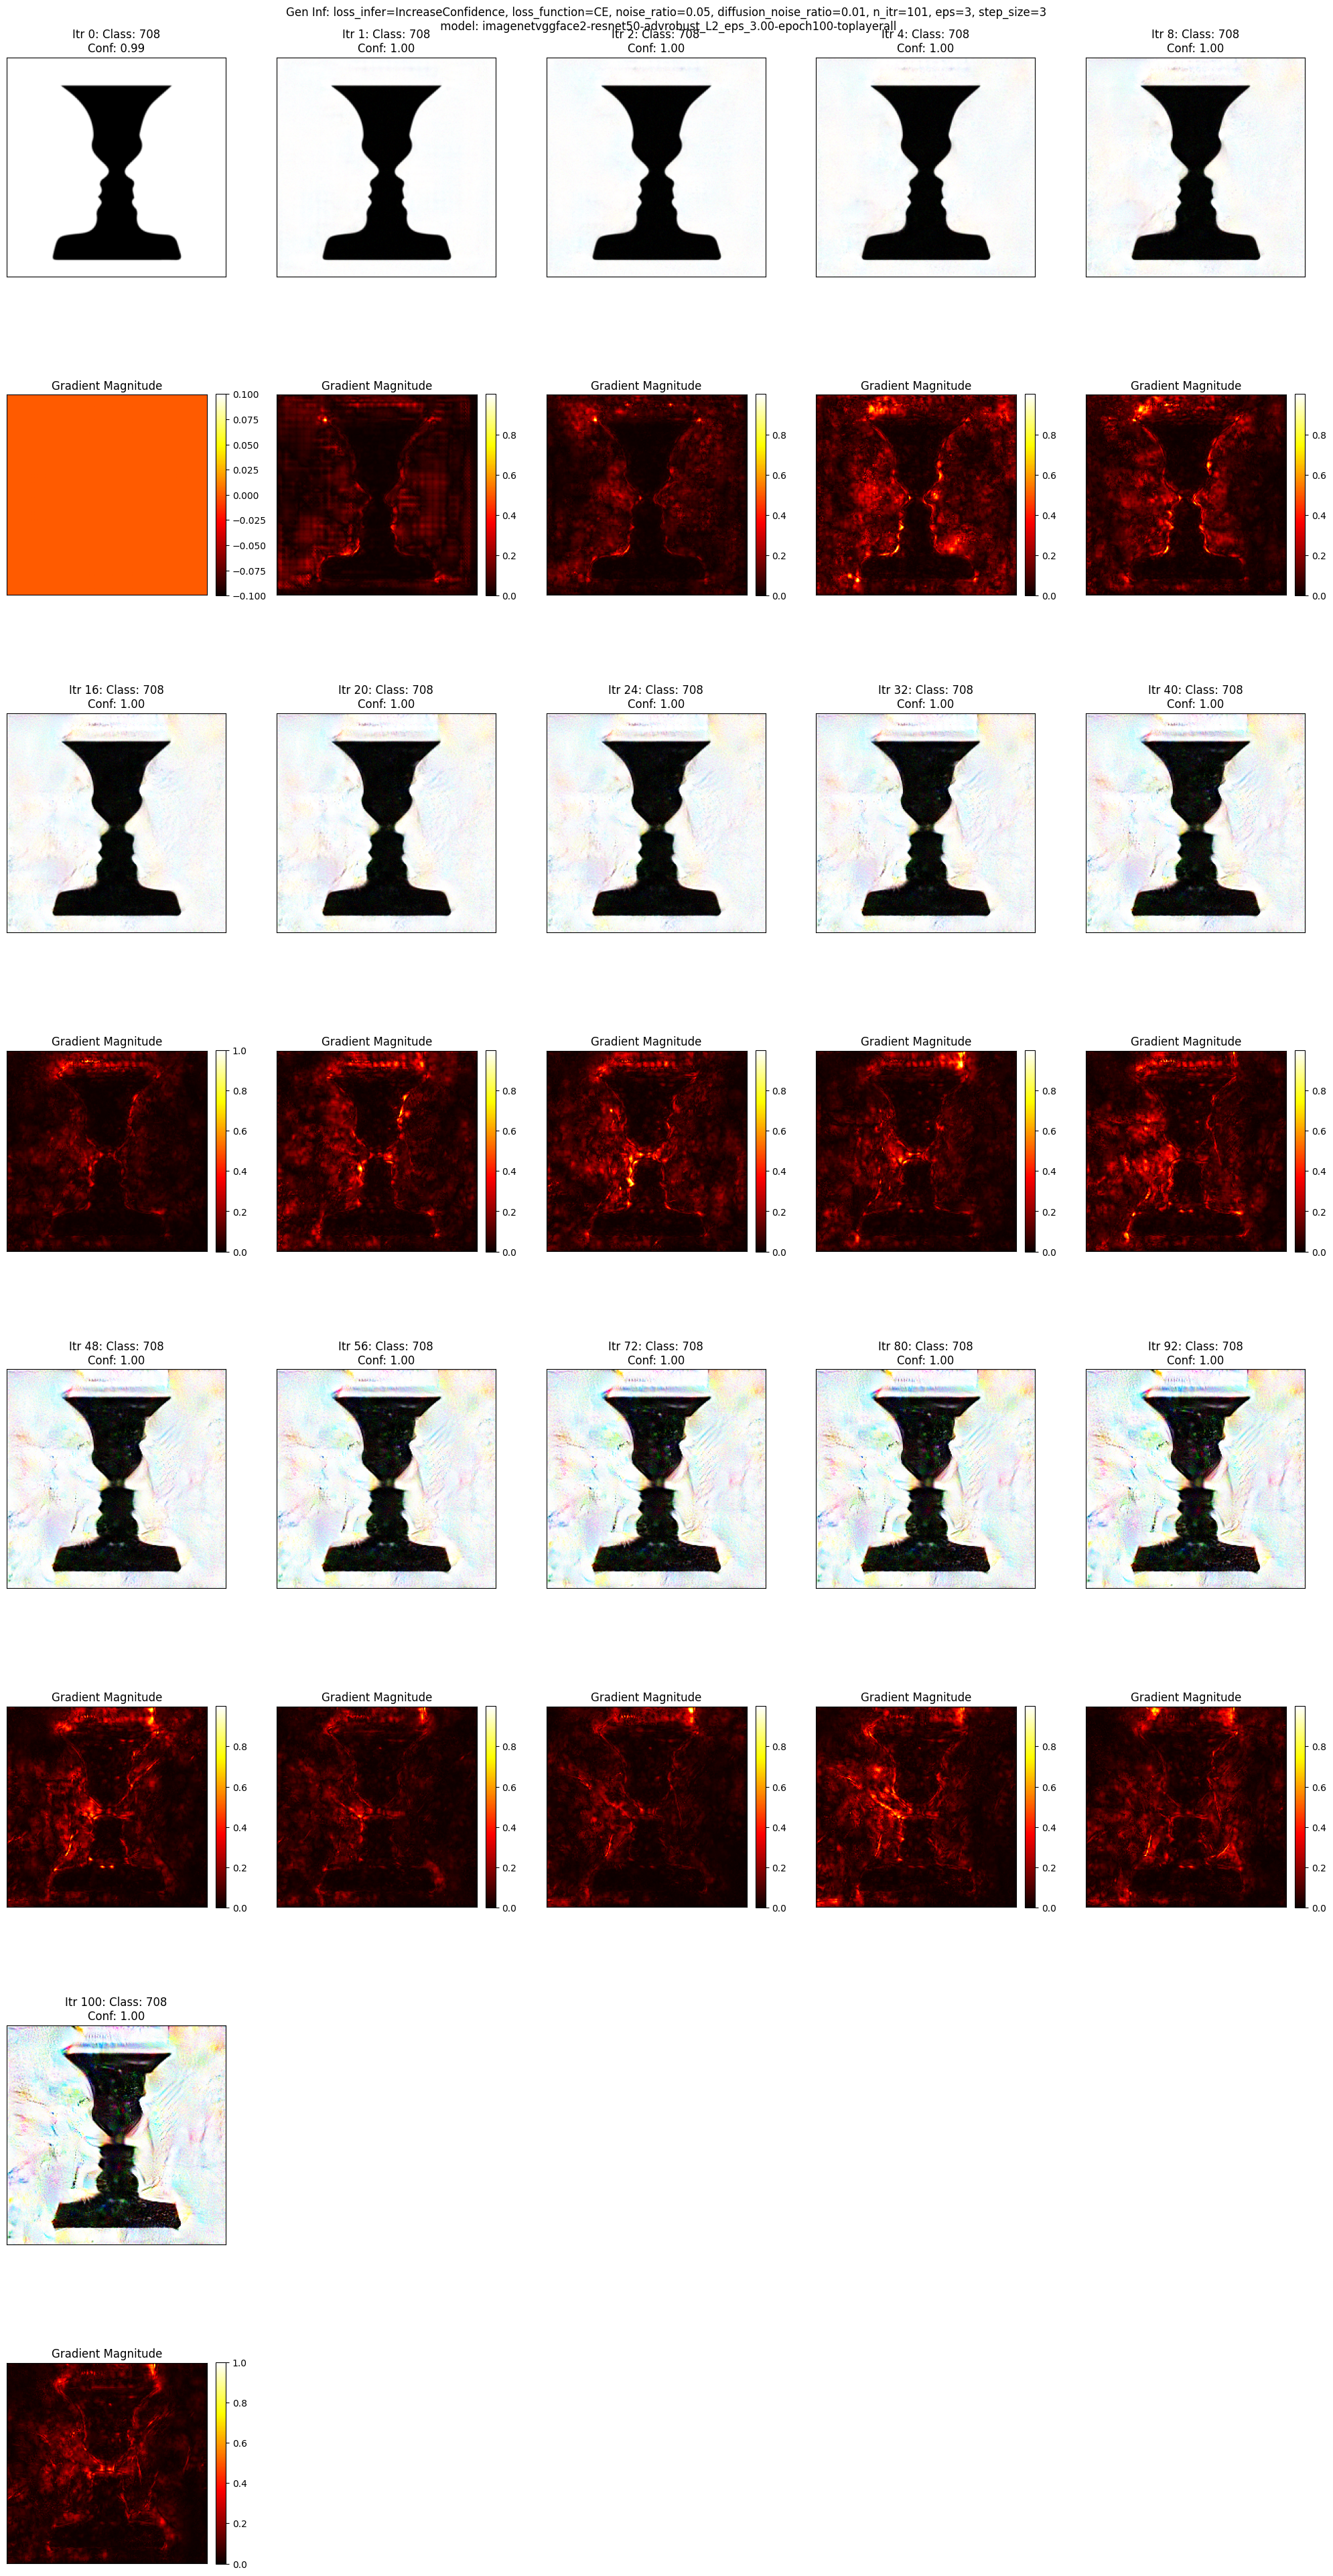

saved at: /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/imagenetvggface2-resnet50-advrobust_L2_eps_3.00-100/FaceVaseWhite_all_geninf_imagenetvggface2_resnet50_advrobust_L2_eps_3.00_epoch100_IncreaseConfidence_CE_noise_ratio0.05_diffusion_noise_ratio0.01_n_itr101_eps3_step_size3_confitr0_False_with_gradients.pdf


In [416]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

# show the images and gradients in a grid - now with 2 rows per pattern
n_cols = 5
n_pattern_rows = len(selected_inferred_patterns)//n_cols + (1 if len(selected_inferred_patterns)%n_cols > 0 else 0)
if n_pattern_rows == 0:
    n_pattern_rows = 1
# Double the rows to accommodate gradients below each image
n_total_rows = n_pattern_rows * 2
fig, axes = plt.subplots(n_total_rows, n_cols, figsize=[20, 5*n_pattern_rows * 2])

if model_config['dataset_model'] == 'vggface2':
    norm_mean = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
elif model_config['dataset_model'] == 'imagenet' or model_config['dataset_model'] == 'imagenetvggface2':
    norm_mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1).cuda()

for i in range(len(selected_inferred_patterns)):
    # Calculate positions for image and gradient
    row_idx = (i // n_cols) * 2  # Multiply by 2 to skip rows for gradients
    col_idx = i % n_cols
    
    # Get axes for both image and gradient
    if n_pattern_rows == 1:
        ax_img = axes[0] if n_cols == 1 else axes[col_idx]
        ax_grad = axes[1] if n_cols == 1 else axes[n_cols + col_idx]
    else:
        ax_img = axes[row_idx, col_idx]
        ax_grad = axes[row_idx + 1, col_idx]
        
    # Get the image and corresponding gradients
    image_to_compute = selected_inferred_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    gradients = selected_grad_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    
    # Normalize gradients for visualization
    grad_magnitude = np.sqrt(np.sum(gradients**2, axis=2))
    grad_normalized = (grad_magnitude - grad_magnitude.min()) / (grad_magnitude.max() - grad_magnitude.min() + 1e-8)
        
    
    predicted_emotion = 'N/A'
    confidence_emotion = 0
    first_itr_conf_got_high = 0
    emotion_detected = False
    color_title = 'black'
    
    # Plot image in top subplot
    ax_img.imshow(image_to_compute)
    # Plot gradient heatmap in bottom subplot
    gradient_plot = ax_grad.imshow(grad_normalized, cmap='hot')
    plt.colorbar(gradient_plot, ax=ax_grad, fraction=0.046, pad=0.04)
    
    # Set titles
    if model_config['dataset_model'] == 'imagenet':
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {labels_imagenet[perceived_categories[i]]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    else:
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {perceived_categories[i]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    
    ax_grad.set_title('Gradient Magnitude')
    
    # Remove ticks from both subplots
    ax_img.set_xticks([])
    ax_img.set_yticks([])
    ax_grad.set_xticks([])
    ax_grad.set_yticks([])

fig.suptitle(f'Gen Inf: loss_infer={inference_config["loss_infer"]}, loss_function={inference_config["loss_function"]}, noise_ratio={inference_config["initial_inference_noise_ratio"]}, diffusion_noise_ratio={inference_config["diffusion_noise_ratio"]}, n_itr={inference_config["n_itr"]}, eps={inference_config["eps"]}, step_size={inference_config["step_size"]}\n model: {args.dataset_model}-{args.model_arch}-{args.model_training}-epoch{args.epoch_chkpnt}-toplayer{inference_config["top_layer"]}')

# Remove empty axes
for i in range(n_total_rows):
    for j in range(n_cols):
        pattern_idx = (i//2) * n_cols + j
        if pattern_idx >= len(selected_inferred_patterns):
            if n_pattern_rows > 1:
                fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# Save figure
figsave_dir = os.path.join(resultsdir, f'{args.dataset_model}-{args.model_arch}-{args.model_training}-{args.epoch_chkpnt}/')
if not os.path.exists(figsave_dir):
    os.makedirs(figsave_dir)

fig_name = f'{image_name}_{inference_config["top_layer"]}_geninf_{model_config["dataset_model"]}_{model_config["model_arch"]}_{model_config["model_training"]}_epoch{model_config["epoch_chkpnt"]}_{inference_config["loss_infer"]}_{inference_config["loss_function"]}_noise_ratio{inference_config["initial_inference_noise_ratio"]}_diffusion_noise_ratio{inference_config["diffusion_noise_ratio"]}_n_itr{inference_config["n_itr"]}_eps{inference_config["eps"]}_step_size{inference_config["step_size"]}'
fig_name = fig_name + f'_confitr{first_itr_conf_got_high}_{emotion_detected}_with_gradients'

instance_counter = 0
while os.path.exists(os.path.join(figsave_dir, fig_name+'.pdf')):
    print('file already exists, adding instance number')
    if 'instance' in fig_name:
        fig_name = fig_name.split('_instance')[0]
    fig_name = fig_name + f'_instance{instance_counter}'
    instance_counter += 1

fig.savefig(os.path.join(figsave_dir, fig_name+'.pdf'), dpi=300, bbox_inches='tight')
print('saved at:', os.path.join(figsave_dir, fig_name+'.pdf'))

# Save results dictionary
dict_results = {
    'model_config': model_config,
    'inference_config': inference_config,
    'selected_inferred_patterns': selected_inferred_patterns,
    'selected_grad_patterns': selected_grad_patterns,
    'perceived_categories': perceived_categories,
    'iteration_numbers': iteration_numbers,
}
np.save(os.path.join(figsave_dir, fig_name+'.npy'), dict_results)

In [399]:
## save a copy of the resulted fig in the resultsdir
path_save_a_copy_significant = os.path.join(resultsdir,'Selected_to_inspect',  fig_name+'.pdf')
fig.savefig(path_save_a_copy_significant, dpi=300, bbox_inches='tight')
print('saved a copy of the resulted fig at:', path_save_a_copy_significant)


saved a copy of the resulted fig at: /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/Selected_to_inspect/FaceVaseWhite_layer3_geninf_imagenetvggface2_resnet50_advrobust_L2_eps_3.00_epoch100_ReverseDiffusion_MSE_noise_ratio0.99_diffusion_noise_ratio0.02_n_itr101_eps300_step_size1_confitr0_False_with_gradients.pdf


In [ ]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

path_to_checkpoints = '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenetvggface2_eps_3.00/540a1066-2902-4ed4-9562-53d4fde58440'

log_path = os.path.join(path_to_checkpoints, 'tensorboard', 'events.out.tfevents.1726868901.ax25.rc.zi.columbia.edu')

# Load the event file
event_acc = EventAccumulator(log_path)
event_acc.Reload()

# Get available scalar tags
print(event_acc.Tags()['scalars'])

# Extract scalar values
# for tag in event_acc.Tags()['scalars']:
#     events = event_acc.Scalars(tag)
#     for e in events:
#         print(f"Step: {e.step}, Value: {e.value}")



['adv_train_loss', 'adv_train_top1', 'adv_train_top5', 'nat_val_loss', 'nat_val_top1', 'nat_val_top5', 'adv_val_loss', 'adv_val_top1', 'adv_val_top5']


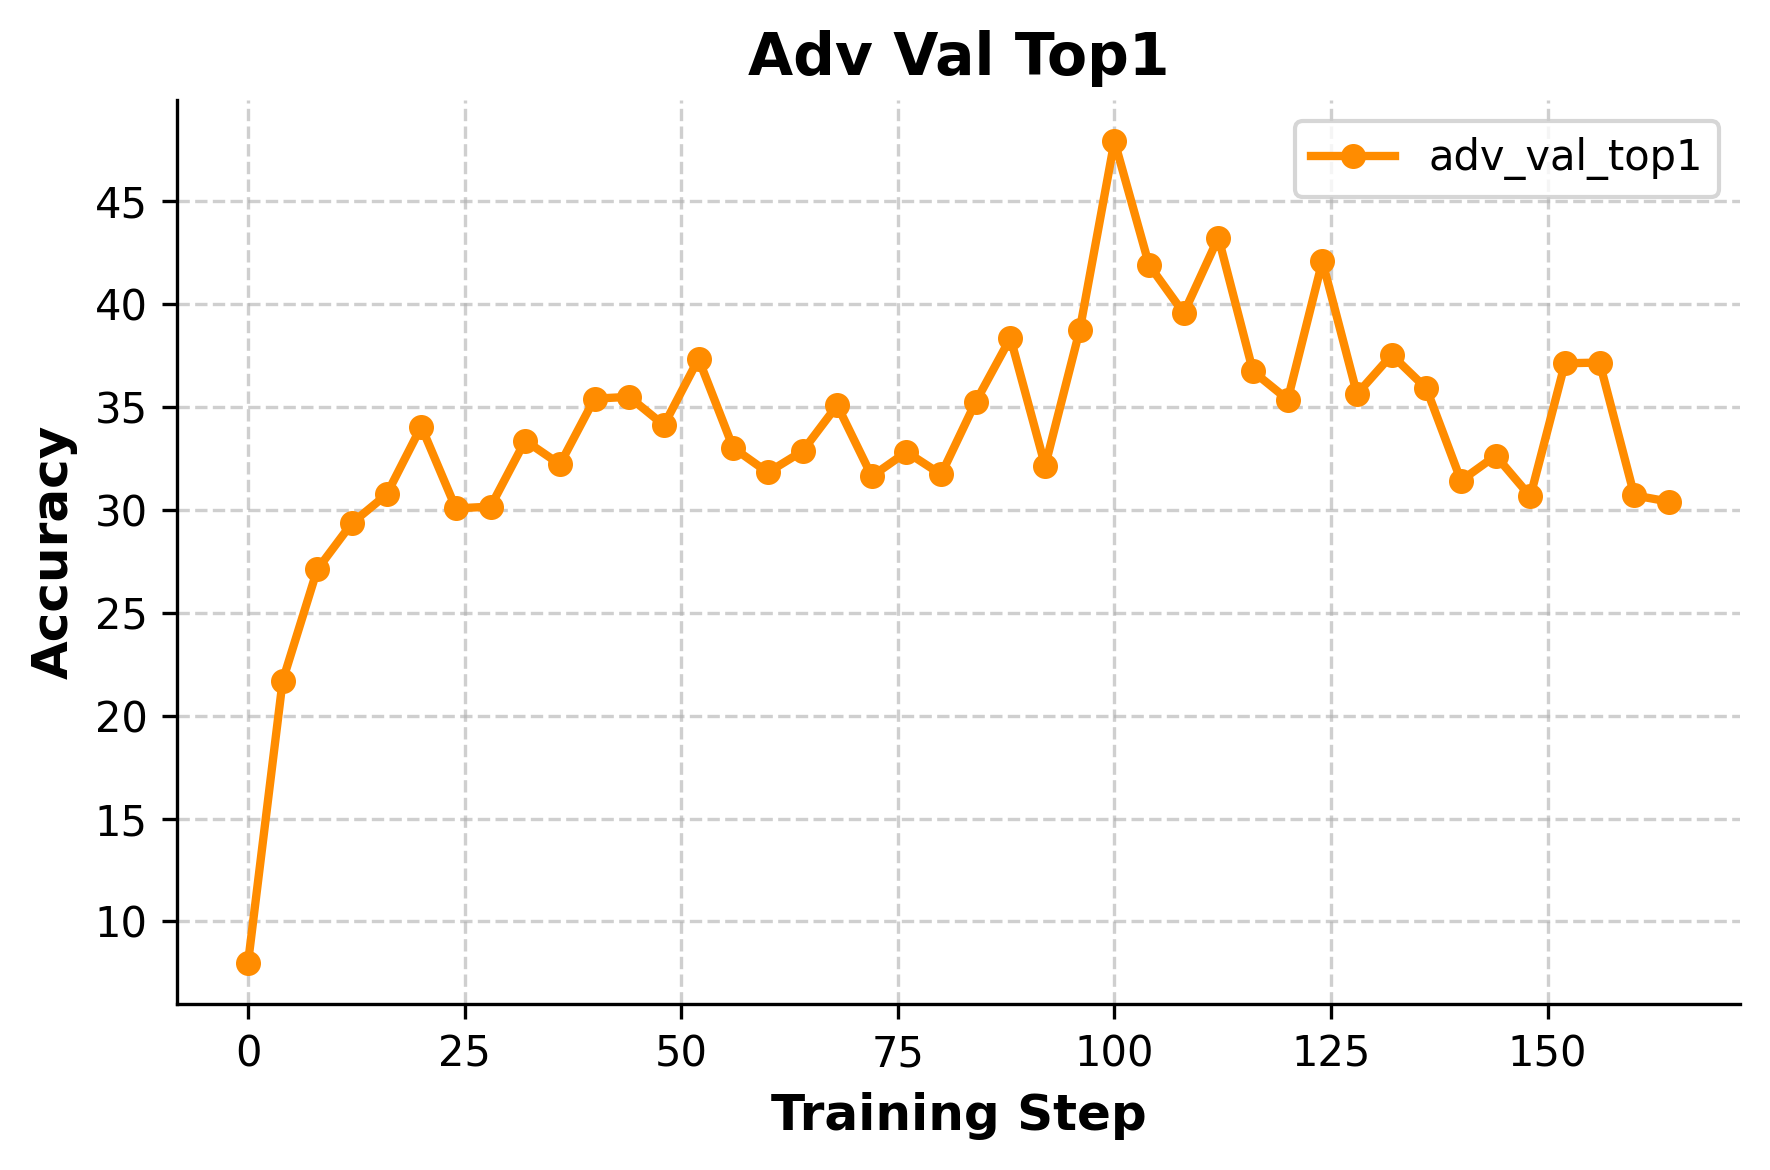

In [395]:
# Choose a scalar tag to plot (e.g., 'adv_train_loss')
selected_tag = 'adv_val_top1'  # Change this to another tag if needed

# Extract scalar values
events = event_acc.Scalars(selected_tag)
steps = np.array([e.step for e in events])
values = np.array([e.value for e in events])

# Create figure for plotting
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Plot the extracted data
ax.plot(steps*2, values, marker='o', linestyle='-', linewidth=2, markersize=5, color='darkorange', label=selected_tag)

# Aesthetics for publication-quality
ax.set_xlabel("Training Step", fontsize=12, fontweight='bold')
ax.set_ylabel("Accuracy", fontsize=12, fontweight='bold')
ax.set_title(f"{selected_tag.replace('_', ' ').title()}", fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=10, loc="upper right")

# Save the figure (optional)
plt.tight_layout()
plt.show()